In [1]:
import pandas as pd

# Fayllarni yuklash
mijozlar = pd.read_csv('mijozlar.csv')
tashriflar = pd.read_csv('tashriflar.csv')

# Sana ustunlarini datetime formatiga o‘tkazish
tashriflar['entry_time'] = pd.to_datetime(tashriflar['entry_time'], dayfirst=False)
tashriflar['exit_time'] = pd.to_datetime(tashriflar['exit_time'], dayfirst=False)

# Telefon raqamlarni to‘g‘ri ko‘rinishga keltirish (agar kerak bo‘lsa)
mijozlar['phone_number'] = mijozlar['phone_number'].apply(lambda x: '{:.0f}'.format(x))

print(mijozlar.head())
print(tashriflar.head())


   id    name  age gender  phone_number
0   1  Sitora   21   Ayol  998972000000
1   2  Sardor   37  Erkak  998908000000
2   3     Ali   61  Erkak  998335000000
3   4  Sardor   49  Erkak  998909000000
4   5  Nigora   65   Ayol  998332000000
   visit_id  customer_id          entry_time           exit_time  \
0         1            1 2022-01-01 14:00:00 2022-01-01 15:34:00   
1         2            2 2022-01-01 17:23:00 2022-01-01 18:41:00   
2         3            3 2022-01-01 11:55:00 2022-01-01 12:43:00   
3         4            4 2022-01-01 10:22:00 2022-01-01 11:16:00   
4         5            5 2022-01-01 13:49:00 2022-01-01 14:20:00   

         purpose  
0      Hujjatlar  
1  Texnik ko‘rik  
2         Servis  
3      Hujjatlar  
4         Servis  


In [3]:
tashriflar['duration'] = tashriflar['exit_time'] - tashriflar['entry_time']
tashriflar['duration_minutes'] = tashriflar['duration'].dt.total_seconds() / 60

print(tashriflar[['visit_id', 'duration_minutes']])


       visit_id  duration_minutes
0             1              94.0
1             2              78.0
2             3              48.0
3             4              54.0
4             5              31.0
...         ...               ...
10866     10867              18.0
10867     10868              64.0
10868     10869              26.0
10869     10870              66.0
10870     10871              20.0

[10871 rows x 2 columns]


In [5]:
data = tashriflar.merge(mijozlar, left_on='customer_id', right_on='id', how='left')

# Keraksiz ustunlarni olib tashlash
data = data.drop(columns=['id'])

print(data.head())


   visit_id  customer_id          entry_time           exit_time  \
0         1            1 2022-01-01 14:00:00 2022-01-01 15:34:00   
1         2            2 2022-01-01 17:23:00 2022-01-01 18:41:00   
2         3            3 2022-01-01 11:55:00 2022-01-01 12:43:00   
3         4            4 2022-01-01 10:22:00 2022-01-01 11:16:00   
4         5            5 2022-01-01 13:49:00 2022-01-01 14:20:00   

         purpose        duration  duration_minutes    name  age gender  \
0      Hujjatlar 0 days 01:34:00              94.0  Sitora   21   Ayol   
1  Texnik ko‘rik 0 days 01:18:00              78.0  Sardor   37  Erkak   
2         Servis 0 days 00:48:00              48.0     Ali   61  Erkak   
3      Hujjatlar 0 days 00:54:00              54.0  Sardor   49  Erkak   
4         Servis 0 days 00:31:00              31.0  Nigora   65   Ayol   

   phone_number  
0  998972000000  
1  998908000000  
2  998335000000  
3  998909000000  
4  998332000000  


In [7]:
print(data.groupby('age')['duration_minutes'].mean())


age
18    64.801843
19    65.528926
20    63.543860
21    66.907489
22    63.560538
23    67.497674
24    63.411215
25    65.220779
26    66.493023
27    66.143498
28    66.274038
29    64.178261
30    64.623377
31    62.117117
32    64.154867
33    60.908629
34    64.621277
35    65.863454
36    64.321739
37    64.642241
38    65.414097
39    66.506787
40    70.430380
41    64.138075
42    66.310811
43    67.021368
44    67.781095
45    61.959091
46    65.025532
47    66.686364
48    63.672727
49    65.737288
50    63.663594
51    66.820175
52    70.660550
53    64.902778
54    65.520362
55    64.659483
56    64.032129
57    63.608511
58    64.068493
59    66.863436
60    64.739316
61    66.587500
62    64.452381
63    62.705394
64    66.489540
65    66.638655
Name: duration_minutes, dtype: float64


In [9]:
print(data['gender'].value_counts())


gender
Ayol     5550
Erkak    5321
Name: count, dtype: int64


In [11]:
print(data.groupby('purpose')['duration_minutes'].mean())


purpose
Hujjatlar                66.610980
Servis                   65.753576
Test drive               64.675145
Texnik ko‘rik            64.411765
Yangi mashina ko‘rish    64.881785
Name: duration_minutes, dtype: float64


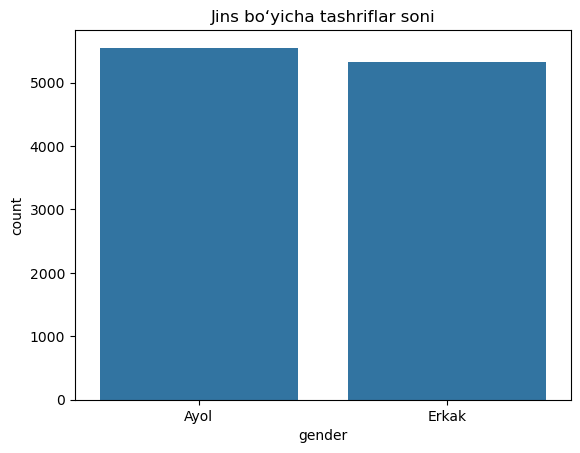

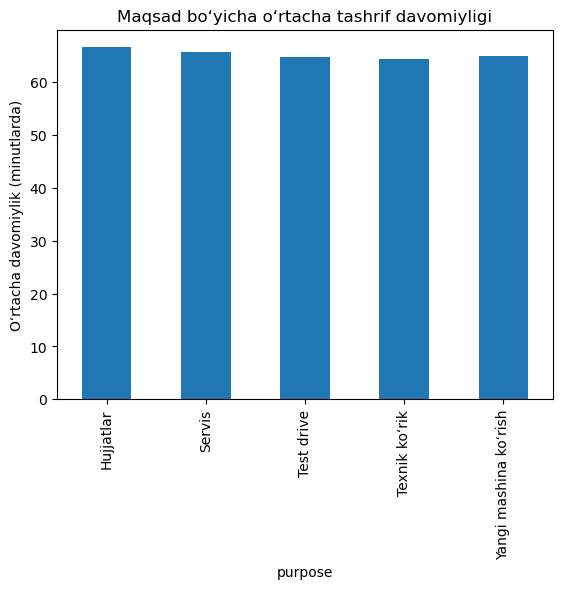

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Masalan, jins bo‘yicha tashriflar soni
sns.countplot(x='gender', data=data)
plt.title('Jins bo‘yicha tashriflar soni')
plt.show()

# Tashrif maqsadlari bo‘yicha o‘rtacha davomiylik
data.groupby('purpose')['duration_minutes'].mean().plot(kind='bar')
plt.ylabel('O‘rtacha davomiylik (minutlarda)')
plt.title('Maqsad bo‘yicha o‘rtacha tashrif davomiyligi')
plt.show()


In [15]:
print(data['duration_minutes'].describe())

# Medianani ham alohida chiqarish
median_duration = data['duration_minutes'].median()
print(f"Median davomiylik: {median_duration:.2f} daqiqa")


count    10871.000000
mean        65.254990
std         31.975377
min         10.000000
25%         38.000000
50%         66.000000
75%         93.000000
max        120.000000
Name: duration_minutes, dtype: float64
Median davomiylik: 66.00 daqiqa


In [17]:
# Yoshni kategoriyalarga ajratamiz
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-17', '18-29', '30-44', '45-59', '60+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# Guruh bo‘yicha tashriflar soni va davomiylik
grouped = data.groupby('age_group').agg({
    'visit_id': 'count',
    'duration_minutes': ['mean', 'median']
}).rename(columns={'visit_id': 'visit_count'})

print(grouped)


          visit_count duration_minutes       
                count             mean median
age_group                                    
0-17              217        64.801843   65.0
18-29            2687        65.268329   66.0
30-44            3392        65.121462   65.0
45-59            3407        65.358967   66.0
60+              1168        65.392979   66.0


C:\Users\user\AppData\Local\Temp\ipykernel_22396\3284310588.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('age_group').agg({


In [19]:
pivot_table = data.pivot_table(
    values='duration_minutes',
    index=['purpose', 'gender'],
    columns='age_group',
    aggfunc='mean'
)

print(pivot_table)


age_group                          0-17      18-29      30-44      45-59  \
purpose               gender                                               
Hujjatlar             Ayol    57.937500  68.621324  68.210356  67.331445   
                      Erkak   64.863636  64.192029  65.582555  65.965625   
Servis                Ayol    54.625000  66.182540  65.888554  65.772222   
                      Erkak   71.480000  65.023715  63.734513  67.209366   
Test drive            Ayol    62.000000  66.049430  65.265416  63.170330   
                      Erkak   56.500000  64.422053  61.551929  67.540785   
Texnik ko‘rik         Ayol    74.741935  67.492806  65.960212  65.737342   
                      Erkak   71.500000  61.500000  65.022222  61.189911   
Yangi mashina ko‘rish Ayol    66.583333  64.282828  65.814208  63.229885   
                      Erkak   60.850000  65.038610  64.266254  66.596825   

age_group                           60+  
purpose               gender             
Huj

C:\Users\user\AppData\Local\Temp\ipykernel_22396\443716558.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(


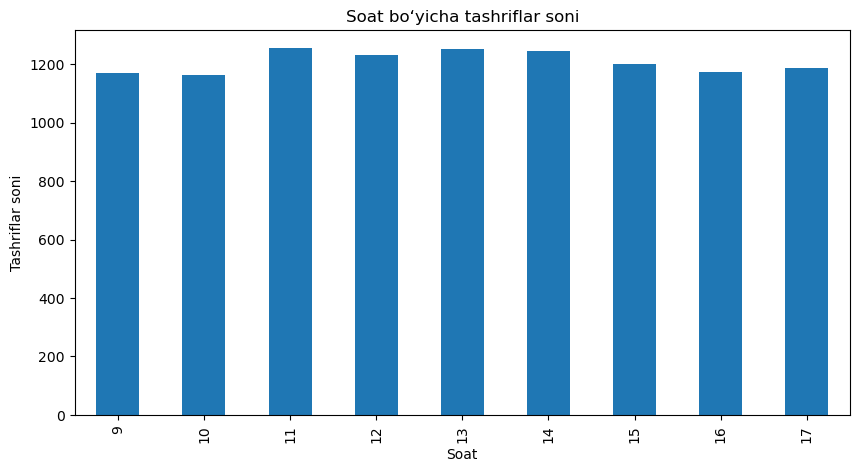

In [21]:
data['entry_hour'] = data['entry_time'].dt.hour
data['entry_date'] = data['entry_time'].dt.date

# Soatlar bo‘yicha tashriflar soni
hourly_visits = data.groupby('entry_hour').size()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
hourly_visits.plot(kind='bar')
plt.title('Soat bo‘yicha tashriflar soni')
plt.xlabel('Soat')
plt.ylabel('Tashriflar soni')
plt.show()


In [23]:
customer_stats = data.groupby('customer_id').agg({
    'duration_minutes': 'mean',
    'visit_id': 'count'
}).rename(columns={'duration_minutes': 'avg_duration', 'visit_id': 'visit_count'})

print(customer_stats.sort_values(by='visit_count', ascending=False))


             avg_duration  visit_count
customer_id                           
1                    94.0            1
7252                112.0            1
7244                 56.0            1
7245                 80.0            1
7246                115.0            1
...                   ...          ...
3626                 97.0            1
3627                 86.0            1
3628                 41.0            1
3629                 25.0            1
10871                20.0            1

[10871 rows x 2 columns]


In [25]:
purpose_customer_counts = data.groupby(['purpose', 'customer_id']).size().reset_index(name='count')

top_customers_per_purpose = purpose_customer_counts.sort_values(['purpose', 'count'], ascending=[True, False]).groupby('purpose').head(3)

print(top_customers_per_purpose)


                    purpose  customer_id  count
0                 Hujjatlar            1      1
1                 Hujjatlar            4      1
2                 Hujjatlar            8      1
2113                 Servis            3      1
2114                 Servis            5      1
2115                 Servis            6      1
4280             Test drive           18      1
4281             Test drive           20      1
4282             Test drive           26      1
6521          Texnik ko‘rik            2      1
6522          Texnik ko‘rik            9      1
6523          Texnik ko‘rik           11      1
8697  Yangi mashina ko‘rish           13      1
8698  Yangi mashina ko‘rish           21      1
8699  Yangi mashina ko‘rish           25      1


In [27]:
corr = data['age'].corr(data['duration_minutes'])
print(f"Yosh va tashrif davomiyligi o‘rtasidagi korrelyatsiya: {corr:.2f}")


Yosh va tashrif davomiyligi o‘rtasidagi korrelyatsiya: 0.00


Tashrif davomiyligi statistikasi:
count    10871.000000
mean        65.254990
std         31.975377
min         10.000000
25%         38.000000
50%         66.000000
75%         93.000000
max        120.000000
Name: duration_minutes, dtype: float64
Median davomiylik: 66.00 daqiqa

Yosh guruhlari bo‘yicha tashriflar soni va davomiylik:
          visit_count duration_minutes       
                count             mean median
age_group                                    
0-17              217        64.801843   65.0
18-29            2687        65.268329   66.0
30-44            3392        65.121462   65.0
45-59            3407        65.358967   66.0
60+              1168        65.392979   66.0 

Maqsad va jins bo‘yicha yosh guruhlari uchun o‘rtacha davomiylik:
age_group                          0-17      18-29      30-44      45-59  \
purpose               gender                                               
Hujjatlar             Ayol    57.937500  68.621324  68.210356  67.331445   

C:\Users\user\AppData\Local\Temp\ipykernel_22396\2401292810.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby('age_group').agg({
C:\Users\user\AppData\Local\Temp\ipykernel_22396\2401292810.py:41: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = data.pivot_table(
C:\Users\user\AppData\Local\Temp\ipykernel_22396\2401292810.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_visits.index, y=hourly_visits.values, palette='viridis')


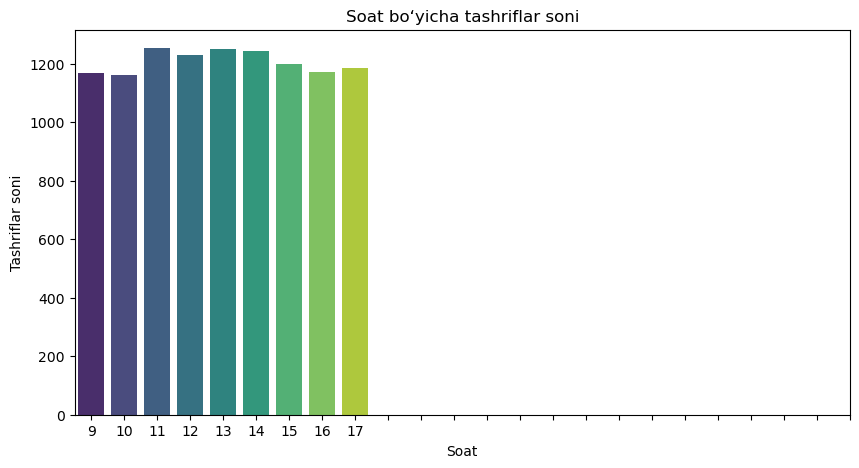

Mijozlar bo‘yicha o‘rtacha tashrif davomiyligi va tashriflar soni:
             avg_duration  visit_count
customer_id                           
1                    94.0            1
7252                112.0            1
7244                 56.0            1
7245                 80.0            1
7246                115.0            1
...                   ...          ...
3626                 97.0            1
3627                 86.0            1
3628                 41.0            1
3629                 25.0            1
10871                20.0            1

[10871 rows x 2 columns] 

Har bir maqsad bo‘yicha eng ko‘p tashrif qilgan mijozlar:
                    purpose  customer_id  count
0                 Hujjatlar            1      1
1                 Hujjatlar            4      1
2                 Hujjatlar            8      1
2113                 Servis            3      1
2114                 Servis            5      1
2115                 Servis            6      1
4280

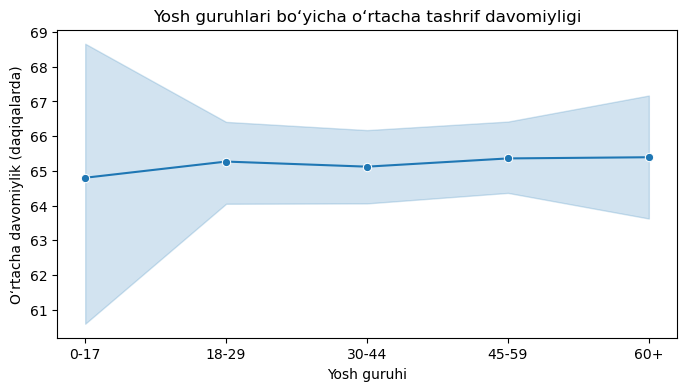

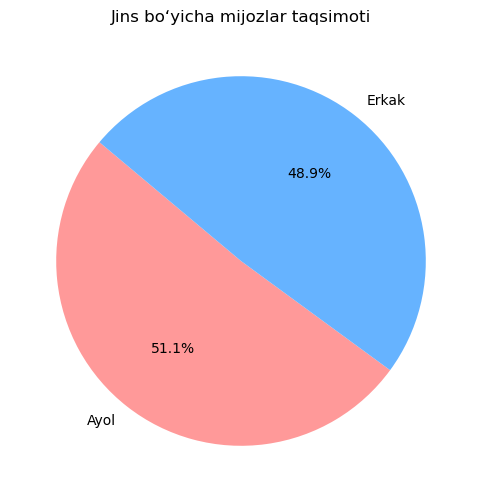

C:\Users\user\AppData\Local\Temp\ipykernel_22396\2401292810.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='pastel')


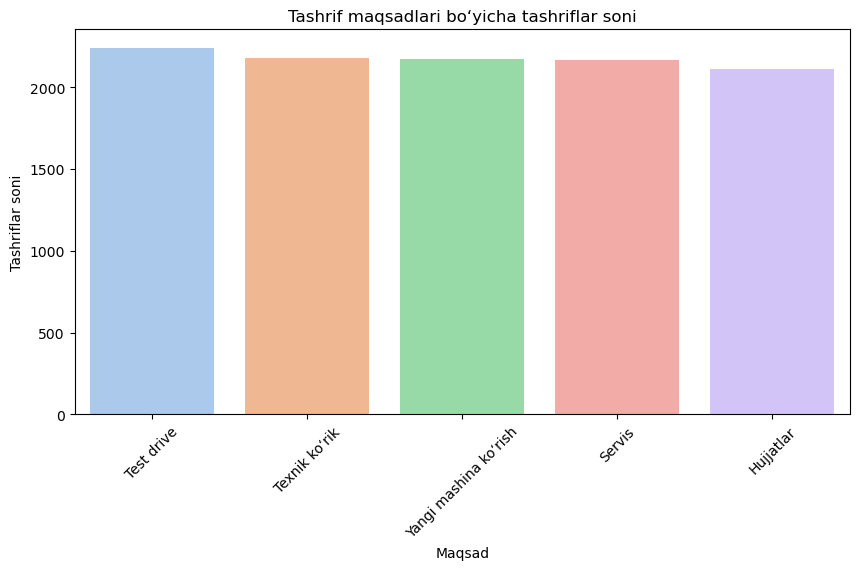

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CSV fayllarni o‘qish
mijozlar = pd.read_csv('mijozlar.csv')
tashriflar = pd.read_csv('tashriflar.csv')

# Sana ustunlarini datetime formatiga o‘tkazish
tashriflar['entry_time'] = pd.to_datetime(tashriflar['entry_time'])
tashriflar['exit_time'] = pd.to_datetime(tashriflar['exit_time'])

# Telefon raqam formatini to‘g‘rilash
mijozlar['phone_number'] = mijozlar['phone_number'].apply(lambda x: '{:.0f}'.format(x))

# Tashrif davomiyligini hisoblash (daqiqalarda)
tashriflar['duration_minutes'] = (tashriflar['exit_time'] - tashriflar['entry_time']).dt.total_seconds() / 60

# Mijozlar va tashriflarni birlashtirish
data = tashriflar.merge(mijozlar, left_on='customer_id', right_on='id', how='left').drop(columns=['id'])

# 1. Umumiy statistik ma’lumotlar
print("Tashrif davomiyligi statistikasi:")
print(data['duration_minutes'].describe())
print(f"Median davomiylik: {data['duration_minutes'].median():.2f} daqiqa\n")

# 2. Yosh guruhlarini yaratish
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-17', '18-29', '30-44', '45-59', '60+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

# Guruh bo‘yicha tashriflar soni va davomiylik
grouped = data.groupby('age_group').agg({
    'visit_id': 'count',
    'duration_minutes': ['mean', 'median']
}).rename(columns={'visit_id': 'visit_count'})
print("Yosh guruhlari bo‘yicha tashriflar soni va davomiylik:")
print(grouped, "\n")

# 3. Har bir maqsad bo‘yicha jins va yosh guruhlarining o‘rtacha davomiyligi
pivot_table = data.pivot_table(
    values='duration_minutes',
    index=['purpose', 'gender'],
    columns='age_group',
    aggfunc='mean'
)
print("Maqsad va jins bo‘yicha yosh guruhlari uchun o‘rtacha davomiylik:")
print(pivot_table, "\n")

# 4. Soatlar bo‘yicha tashriflar taqsimoti
data['entry_hour'] = data['entry_time'].dt.hour
hourly_visits = data.groupby('entry_hour').size()

plt.figure(figsize=(10,5))

sns.barplot(x=hourly_visits.index, y=hourly_visits.values, palette='viridis')
plt.title('Soat bo‘yicha tashriflar soni')
plt.xlabel('Soat')
plt.ylabel('Tashriflar soni')
plt.xticks(range(0,24))
plt.show()

# 5. Har bir mijozning o‘rtacha tashrif davomiyligi va tashriflar soni
customer_stats = data.groupby('customer_id').agg({
    'duration_minutes': 'mean',
    'visit_id': 'count'
}).rename(columns={'duration_minutes': 'avg_duration', 'visit_id': 'visit_count'}).sort_values(by='visit_count', ascending=False)
print("Mijozlar bo‘yicha o‘rtacha tashrif davomiyligi va tashriflar soni:")
print(customer_stats, "\n")

# 6. Maqsad bo‘yicha eng ko‘p tashrif qilgan mijozlar (yuqori 3 ta)
purpose_customer_counts = data.groupby(['purpose', 'customer_id']).size().reset_index(name='count')
top_customers_per_purpose = purpose_customer_counts.sort_values(['purpose', 'count'], ascending=[True, False]).groupby('purpose').head(3)
print("Har bir maqsad bo‘yicha eng ko‘p tashrif qilgan mijozlar:")
print(top_customers_per_purpose, "\n")

# 7. Yosh va tashrif davomiyligi orasidagi korrelyatsiya
corr = data['age'].corr(data['duration_minutes'])
print(f"Yosh va tashrif davomiyligi o‘rtasidagi korrelyatsiya: {corr:.2f}\n")

# Vizualizatsiyalar

# A. Yosh guruhlari bo‘yicha o‘rtacha davomiyliklar (line plot)
plt.figure(figsize=(8,4))
sns.lineplot(data=data, x='age_group', y='duration_minutes', estimator='mean', marker='o')
plt.title('Yosh guruhlari bo‘yicha o‘rtacha tashrif davomiyligi')
plt.xlabel('Yosh guruhi')
plt.ylabel('O‘rtacha davomiylik (daqiqalarda)')
plt.show()

# B. Jins bo‘yicha maqsadlar taqsimoti (pie chart)
plt.figure(figsize=(6,6))
gender_counts = data['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Jins bo‘yicha mijozlar taqsimoti')
plt.show()

# C. Maqsadlar bo‘yicha tashriflar soni (bar chart)
plt.figure(figsize=(10,5))
purpose_counts = data['purpose'].value_counts()

sns.barplot(x=purpose_counts.index, y=purpose_counts.values, palette='pastel')
plt.title('Tashrif maqsadlari bo‘yicha tashriflar soni')
plt.xlabel('Maqsad')
plt.ylabel('Tashriflar soni')
plt.xticks(rotation=45)
plt.show()
